In [1]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 186.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 196.9 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/300.2 kB 348.6 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 583.1 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 811.7 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 805.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import joblib

In [3]:
#Download necessary nltk data
nltk.download ("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [6]:
#load the dataset
url="https://raw.githubusercontent.com/siddhantbhattarai/AI-DataScience-BootCamp/main/SMSSpamCollection"
df=pd.read_csv(url,sep="\t",names=["label","message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Check the missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
#Check the duplicated values
df.duplicated().sum()

403

In [9]:
#Drop the duplicate values
cleaned_df=df.drop_duplicates()
cleaned_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#Check is the value is dropped
cleaned_df.duplicated().sum()

0

In [11]:
#Basic statistics of the dataset
cleaned_df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [12]:
#Count the spam vs ham message
cleaned_df["label"].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

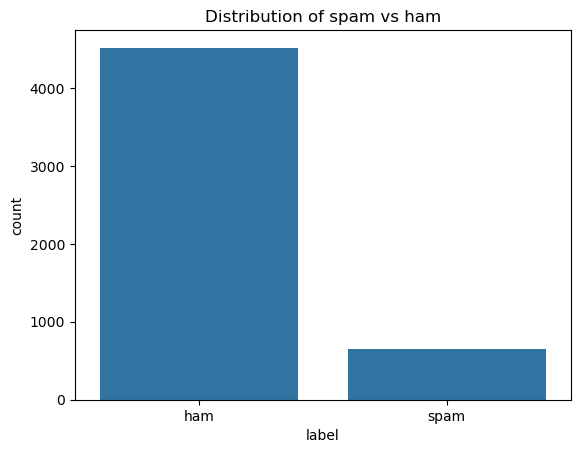

In [13]:
#Visualization:Distribution of spam vs ham
sns.countplot(x="label",data=cleaned_df)
plt.title("Distribution of spam vs ham")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24732\2993188081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["message_length"]=cleaned_df["message"].apply(len)


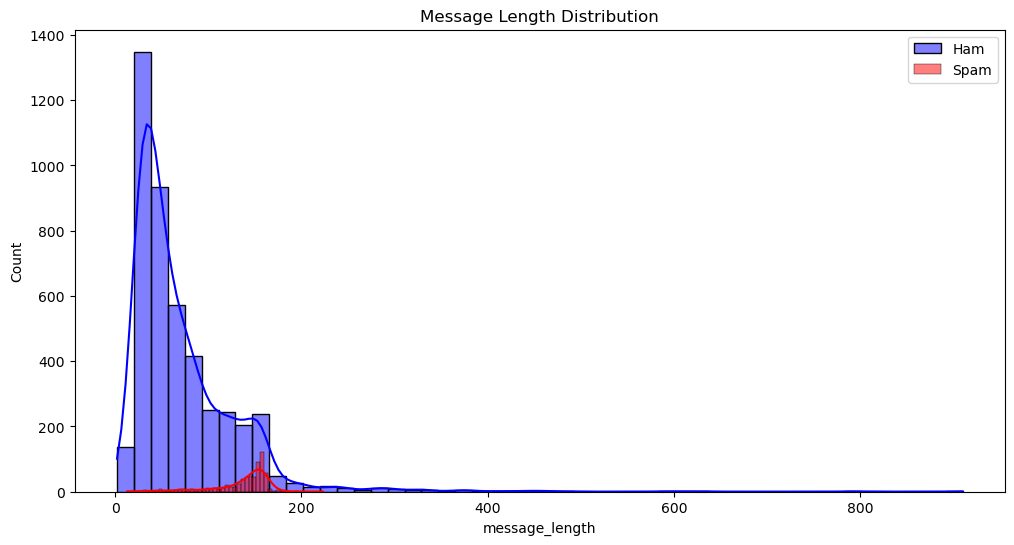

In [14]:
#Visualize the message length 
cleaned_df["message_length"]=cleaned_df["message"].apply(len)
plt.figure(figsize=(12,6))
sns.histplot(cleaned_df[cleaned_df["label"]=="ham"]["message_length"],label="Ham",color="blue",bins=50,kde=True)
sns.histplot(cleaned_df[cleaned_df["label"]=="spam"]["message_length"],label="Spam",color="red",bins=50,kde=True)
plt.title("Message Length Distribution")
plt.legend()
plt.show()

In [15]:
#Visualization: Word Clouds for spam and ham messages
spam_words="".join(cleaned_df[cleaned_df["label"]=="spam"]["message"])
ham_words="".join(cleaned_df[cleaned_df["label"]=="ham"]["message"])

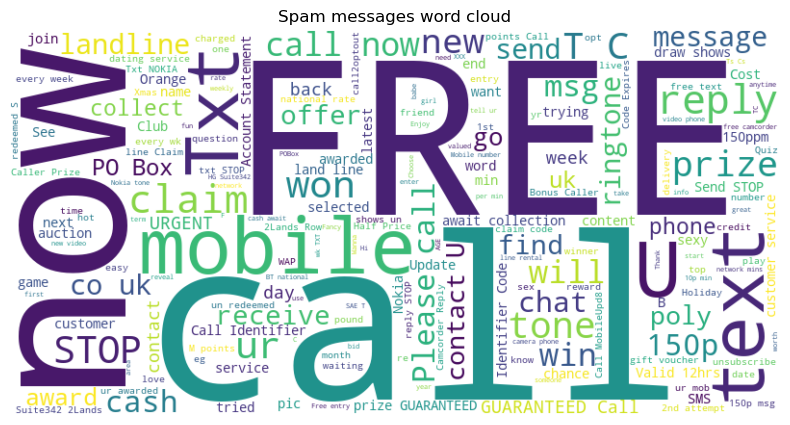

In [16]:
spam_wordcloud=WordCloud(width=800,height=400,background_color="white").generate(spam_words)
plt.figure(figsize=(10,5))
plt.imshow(spam_wordcloud,interpolation="bilinear")
plt.title("Spam messages word cloud")
plt.axis("off")
plt.show()

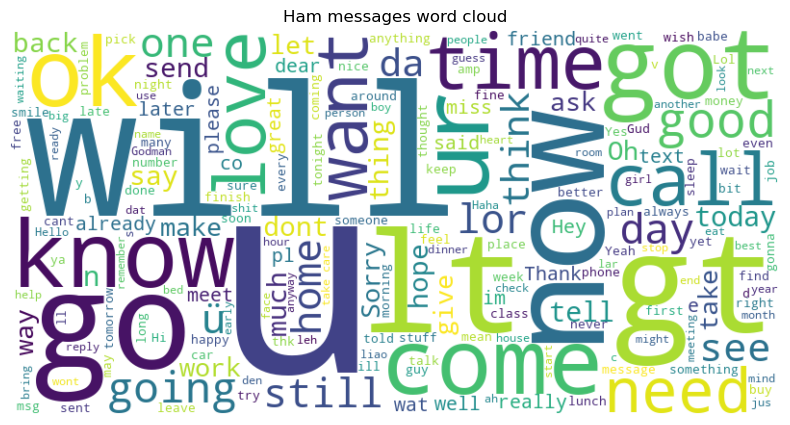

In [17]:
ham_wordcloud=WordCloud(width=800,height=400,background_color="white").generate(ham_words)
plt.figure(figsize=(10,5))
plt.imshow(ham_wordcloud,interpolation="bilinear")
plt.title("Ham messages word cloud")
plt.axis("off")
plt.show()